# 1.0 Data Import

In [4]:
import psycopg2
import pandas as pd

pd.set_option('display.max_columns', 500)

In [5]:
df = pd.read_csv('data/full-data.csv')
df.head()

,isbn,rating_book_id,book_title,rating,price,publisher_name,marketing_spend,genre_desc,series_name,format_desc,author_name,Year Won,sales_count,invoice
0,989-28-654-4370-9,DE571,Don t Check your Ego,3.99,15.99,Palimpsest Printing,48000.0,Nonfiction,NaN,Trade paperback,R.M. Larner,NaN,45.0,719.55
1,989-28-654-9826-6,DE571,Don t Check your Ego,3.99,28.99,Palimpsest Printing,48000.0,Nonfiction,NaN,Hardcover,R.M. Larner,NaN,14.0,405.86
2,989-28-79-91028-0,TM925,The Mallemaroking,4.66,12.50,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Trade paperback,Bianca Thompson,2179.0,1368.0,17100.00
3,989-28-79-13801-1,TM925,The Mallemaroking,4.66,8.99,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Mass market paperback,Bianca Thompson,2179.0,4568.0,41066.32
4,989-28-79-71565-6,TM925,The Mallemaroking,4.66,21.50,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Hardcover,Bianca Thompson,2179.0,1279.0,27498.50


# 2.0 - NEW SCRIPT - STORRY TELLING

## Apresentação do desafio

A diretoria da **BiblioTech Insights** lançou um desafio ambicioso: **"Como podemos usar nossos dados para tomar decisões mais inteligentes, otimizar nossas operações e moldar um futuro mais eficiente para o nosso negócio?"**

## Resolução

## Apresentação dos dados



In [7]:
import plotly.graph_objects as go
import plotly.express as px

Quantidade de Livros ( int) —> 



In [8]:
# Define the value to display
value_to_display = df['book_title'].nunique()

# Create an indicator chart
fig = go.Figure(go.Indicator(
    mode="number",
    value=value_to_display,
    title={"text": "Unique Book Titles"},
    number={"font": {"size": 48}},
    domain={"x": [0, 1], "y": [0, 1]}
))

fig.update_layout(
    height=200,
    width=1200,
    template='plotly_white'
)

fig.show()


## Functions for plotting horizontal bar graphs 

In [125]:
# Function to create a horizontal bar graph for any categorical column
def create_horizontal_bar_plot(dataframe, column_name):
    df_plot = dataframe[column_name].value_counts().reset_index()
    df_plot.columns = [column_name.replace('_', ' ').title(), 'Count']
    df_plot = df_plot.sort_values('Count', ascending=True)

    fig = px.bar(
        df_plot,
        x='Count',
        y=column_name.replace('_', ' ').title(),
        title=f'Distribution of {column_name.replace("_", " ").title()}',
        labels={'Count': 'Count', column_name.replace('_', ' ').title(): column_name.replace('_', ' ').title()},
        orientation='h',
        color='Count',
        color_continuous_scale='Viridis_r'
    )

    fig.update_layout(
        template='plotly_white',
        title_font_size=16,
        xaxis_title='Count',
        yaxis_title=column_name.replace('_', ' ').title(),
        height=400,
        width=1200
    )

    fig.show()

Quantidade de gêneros(gráfico de pizza) —> 



In [126]:
# Create a horizontal bar plot for 'genre_desc'
create_horizontal_bar_plot(df, 'genre_desc')


tipos de livros (nomes) —>


In [127]:

# Create a horizontal bar plot for 'format_desc'
create_horizontal_bar_plot(df, 'format_desc')


editoras (gráfico de barra) —>



In [128]:

# Create a horizontal bar plot for 'publisher_name'
create_horizontal_bar_plot(df, 'publisher_name')

## Functions for boxplot and bar graph analysis 

In [139]:
import pandas as pd
import plotly.express as px

# Function to create a box plot for any numeric column
def create_box_plot(dataframe, column_name):
    fig = px.box(
        dataframe,
        x=column_name,
        title=f'Box Plot Distribution of {column_name.title()} Amounts',
        labels={column_name: f'{column_name.title()} Amount'},
        color_discrete_sequence=['skyblue']
    )
    fig.update_layout(
        yaxis_title=f'{column_name.title()} Amount',
        template='plotly_white',
        height=400,
        width=1200
    )
    fig.show()

# Function to create a horizontal bar graph for aggregated high values
def create_high_value_bar_plot(dataframe, column_name, aggregation_column, quantile=0.75):
    high_value_threshold = dataframe[aggregation_column].quantile(quantile)

    filtered_df = dataframe[dataframe[aggregation_column] >= high_value_threshold]

    grouped_df = filtered_df.groupby(column_name, as_index=False).agg({
        aggregation_column: 'sum'
    })

    grouped_df = grouped_df.sort_values(aggregation_column, ascending=False).round(2)

    fig = px.bar(
        grouped_df,
        x=aggregation_column,
        y=column_name,
        title=f'High {aggregation_column.title()} by {column_name.title()}',
        labels={column_name: column_name.replace('_', ' ').title(), aggregation_column: aggregation_column.replace('_', ' ').title()},
        orientation='h',
        color=aggregation_column,
        color_continuous_scale='Viridis_r'
    )

    fig.update_layout(
        xaxis_title=aggregation_column.replace('_', ' ').title(),
        yaxis_title=column_name.replace('_', ' ').title(),
        template='plotly_white',
        height=400,
        width=1200
    )

    fig.show()



Vendas por Livros (gráfico de barras 1ºquartil) —> 



In [140]:
# Example usage
# Assuming `df` is your DataFrame

df['invoice'] = df['invoice'].astype('float64')
df['book_title'] = df['book_title'].fillna('Unknown')

# Create a box plot for 'invoice'
create_box_plot(df, 'invoice')

# Create a bar plot for high 'invoice' by 'book_title'
create_high_value_bar_plot(df, column_name='book_title', aggregation_column='invoice')


Vendas por gêneros(gráfico de barras 1ºquartil) —> 



In [141]:

# Create a bar plot for high 'invoice' by 'genre_desc'
create_high_value_bar_plot(df, column_name='genre_desc', aggregation_column='invoice')


Vendas por formatos (gráfico de barras 1ºquartil) —>



In [142]:

# Create a bar plot for high 'invoice' by 'format_desc'
create_high_value_bar_plot(df, column_name='format_desc', aggregation_column='invoice')


Vendas por editoras (gráfico de barras 1ºquartil) —>



In [143]:

# Create a bar plot for high 'invoice' by 'publisher_name'
create_high_value_bar_plot(df, column_name='publisher_name', aggregation_column='invoice')


Vendas por autores ()


In [144]:

# Create a bar plot for high 'invoice' by 'author_name'
create_high_value_bar_plot(df, column_name='author_name', aggregation_column='invoice')



### Insights Acionáveis

H1 - Livros com baixo preço vendem mais.

R1 - Livros com baixo preço($0-$10) de fato vendem mais, porém os livros na faixa de preço de $20-$30 representam basicamente o mesmo faturamento.


In [152]:

# Defining price ranges
bins = [0, 10, 20, 30, 50]  # Price range limits
labels = ['0-10', '10-20', '20-30', '30-50']  # Price range labels

# Creating a price range column
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Aggregating sales by price range
sales_by_price_range = df.groupby('price_range',  observed=False)['sales_count'].sum()
invoice_by_price_range = df.groupby('price_range',  observed=False)['invoice'].sum()

# Creating the first chart: Sales Count by Price Range
fig_sales = go.Figure()
fig_sales.add_trace(go.Bar(
    x=sales_by_price_range.index.astype(str),
    y=sales_by_price_range,
    name='Sales Count',
    marker=dict(color='skyblue')
))
fig_sales.update_layout(
    title='Sales Count by Price Range',
    xaxis=dict(title='Price Range', tickangle=45),
    yaxis=dict(title='Sales Count'),
    height=400
)

# Creating the second chart: Total Sales by Price Range
fig_invoice = go.Figure()
fig_invoice.add_trace(go.Bar(
    x=invoice_by_price_range.index.astype(str),
    y=invoice_by_price_range,
    name='Total Sales',
    marker=dict(color='red')
))
fig_invoice.update_layout(
    title='Total Sales by Price Range',
    xaxis=dict(title='Price Range', tickangle=45),
    yaxis=dict(title='Total Sales'),
    height=400
)

# Displaying the charts
fig_sales.show()
fig_invoice.show()

# Merging the data into a DataFrame, if needed
df_by_price_range = pd.DataFrame({
    'Sales Count': sales_by_price_range,
    'Total Sales': invoice_by_price_range
})
df_by_price_range


,Sales Count,Total Sales
price_range,,
0-10,34404.0,298897.49
10-20,11453.0,147618.25
20-30,11541.0,258138.43
30-50,365.0,12850.22



Insight 7 - Quantidade de vendas por faixa de preço e faturamento por faixa de preço

Obs - Segmentar faixa de preço por formato de livro



H2 - Livros com maiores avaliações vendem mais. 

R2 - Não necessariamente os livros com maiores avaliações são os que mais vendem.



In [ ]:
df_rating = df.groupby('book_title', as_index=False).agg({
    'rating': 'mean',
    'invoice': 'sum',
    'sales_count':'sum',    
    'price':'mean'
})
df_rating.sort_values('rating', ascending= False).round(2)
df_rating.head()

,book_title,rating,invoice,sales_count,price
0,(im)Mortality,4.08,784.41,59.0,17.49
1,9803 North Millworks Road,4.09,49127.12,4088.0,15.99
2,A Horrible Human with the Habits of a Monster,3.71,6597.25,275.0,23.99
3,Adventures of Kaya,4.42,24903.23,2077.0,11.99
4,Alanna Saves the Day,4.02,15984.22,1778.0,8.99


In [177]:

# Create a box plot for 'ratings'
create_box_plot(df, 'rating')


In [184]:
# Create df_rating sorted by ratings 
df_rating = df.groupby('book_title', as_index=False).agg({
    'rating': 'mean',
    'invoice': 'sum',
    'sales_count':'sum',    
    'price':'mean'
})
df_rating.sort_values('rating', ascending= False).round(2)

# Calculate the top quartile threshold
top_quartile_threshold = df_rating['rating'].quantile(0.5)

# Filter the top quartile
top_quartile = df_rating[df_rating['rating'] >= top_quartile_threshold]

top_quartile = top_quartile.sort_values('rating', ascending=False)

# Create the figure
fig = go.Figure()

# Add the bar chart for ratings
fig.add_trace(go.Bar(
    x=top_quartile['book_title'],
    y=top_quartile['rating'],
    name='Rating',
    marker_color='skyblue',
    yaxis='y1'
))

# Add the line chart for invoice
fig.add_trace(go.Scatter(
    x=top_quartile['book_title'],
    y=top_quartile['invoice'],
    name='Invoice',
    mode='lines+markers',
    marker_color='red',
    yaxis='y2'
))

# Update the layout for dual Y-axes
fig.update_layout(
    title='Top Quartile Books by Rating and Invoice',
    xaxis=dict(title='Book Title', tickangle=45),
    yaxis=dict(  # Define the primary Y-axis
        title='Average Rating',
        titlefont=dict(color='skyblue'),
        tickfont=dict(color='skyblue'),
        side='left',
        range=[4, 4.7]  # Set range for the Rating axis
    ),
    yaxis2=dict(  # Define the secondary Y-axis
        title='Total Invoice',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.5, y=1.1, orientation='h'),
    height=500
)

# Show the plot
fig.show()


In [181]:
import plotly.graph_objects as go
import pandas as pd

# Create df_invoice grouped by book_title and aggregated metrics
df_invoice = df.groupby('book_title', as_index=False).agg({
    'rating': 'mean',
    'invoice': 'sum',
    'sales_count': 'sum',    
    'price': 'mean'
}).round(2)

# Calculate the top quartile threshold for invoice
top_quartile_threshold = df_invoice['invoice'].quantile(0.75)

# Filter the top quartile based on invoice
top_quartile = df_invoice[df_invoice['invoice'] >= top_quartile_threshold]

# Sort by invoice in descending order for better visualization
top_quartile = top_quartile.sort_values('invoice', ascending=False)

# Create the figure
fig = go.Figure()

# Add the bar chart for invoice
fig.add_trace(go.Bar(
    x=top_quartile['book_title'],
    y=top_quartile['invoice'],
    name='Invoice',
    marker_color='red',
    yaxis='y1'
))

# Add the line chart for rating
fig.add_trace(go.Scatter(
    x=top_quartile['book_title'],
    y=top_quartile['rating'],
    name='Rating',
    mode='lines+markers',
    marker_color='skyblue',
    yaxis='y2'
))

# Update the layout for dual Y-axes
fig.update_layout(
    title='Top Quartile Books by Invoice and Rating',
    xaxis=dict(title='Book Title', tickangle=45),
    yaxis=dict(  # Define the primary Y-axis for Invoice
        title='Total Invoice',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        side='left'
    ),
    yaxis2=dict(  # Define the secondary Y-axis for Rating
        title='Average Rating',
        titlefont=dict(color='skyblue'),
        tickfont=dict(color='skyblue'),
        overlaying='y',
        side='right',
        range=[3, 5]  # Adjust the range for Rating
    ),
    legend=dict(x=0.5, y=1.1, orientation='h'),
    height=500
)

# Show the plot
fig.show()


Insight 1 - Possibilidade de criar promoções com os livros com maior avaliação para impulsionar vendas

H3 - Editoras que publicam livros com alto rating vendem mais?

R3 - Sim, essas editoras representam x% do faturamento total.



Insight 3 - Buscar acordos e bom relacionamento com essas editoras para trazer novos títulos.

H4 - Livros premiados vendem mais?

R4 - melhorar analise



Insight 4 - 

H5 - Livros seriados vendem mais?

R5 - Sim. melhorar analise



Insight 6 - Trazer novos livros seriados para o catálogo.

H6 - Investimento em marketing reflete nas vendas?

R6 - Sim



Insight 8 - Questionar com a staff a feature marketing spend

H7 - Há uma recorrência de livros vendidos em conjunto?

R7 - 



Insight - criar pacotes de vendas ou tentar achar um padrão nos livros que são comprados em conjunto.

H8 - Existe sazonalidade de vendas?

R8 - 



Insight -

H9 - Quais gêneros vendem mais por formato de livro

R9 - 



Insight - 

Relacionar editora com gênero

# 2.0 - Ánalise de Hipóteses

## Insight 1.0 - High Rating and Low Volume Analysis


### - **Insights:**
  - Determinar os gêneros mais rentáveis para priorizar investimentos.                           
  - Verificar quais livros/gêneros/formato têm alta avaliação, mas baixo volume de vendas, para estratégias promocionais específicas.  

In [12]:
## Genre View
df_genre = df.groupby('genre_desc', as_index=False).agg({
    'invoice': 'sum',
    'sales_count':'sum',
    'rating': 'mean',
    'price':'mean'
})
df_genre.sort_values('invoice', ascending= False).round(2)

,genre_desc,invoice,sales_count,rating,price
6,SciFi/Fantasy,294438.87,20514.0,4.08,16.26
3,Mystery,106022.95,9005.0,4.04,15.66
1,Fiction,91148.44,5799.0,3.96,19.30
5,Romance,73178.50,7703.0,4.22,9.50
7,Young Adult,70501.33,5570.0,4.14,15.74
0,Childrens,57419.03,7897.0,4.22,7.82
4,Nonfiction,16432.19,883.0,3.76,24.66
2,Memoir,8363.08,392.0,4.13,24.79


In [13]:
import plotly.express as px

# Sort the DataFrame by 'invoice' in descending order
df_genre_sorted = df_genre.sort_values('invoice', ascending=False)

# Create a bar graph with Plotly and invert the color scale
fig = px.bar(
    df_genre_sorted,
    x='genre_desc',
    y='invoice',
    title='Invoice by Genre (Sorted by Invoice Amount)',
    labels={'genre_desc': 'Genre Description', 'invoice': 'Invoice Amount'},
    color='invoice',
    color_continuous_scale=px.colors.sequential.Viridis_r  # Inverted Viridis color scale
)

# Customize layout for better readability
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title='Genre Description',
    yaxis_title='Invoice Amount',
    template='plotly_white'
)

# Display the plot
fig.show()

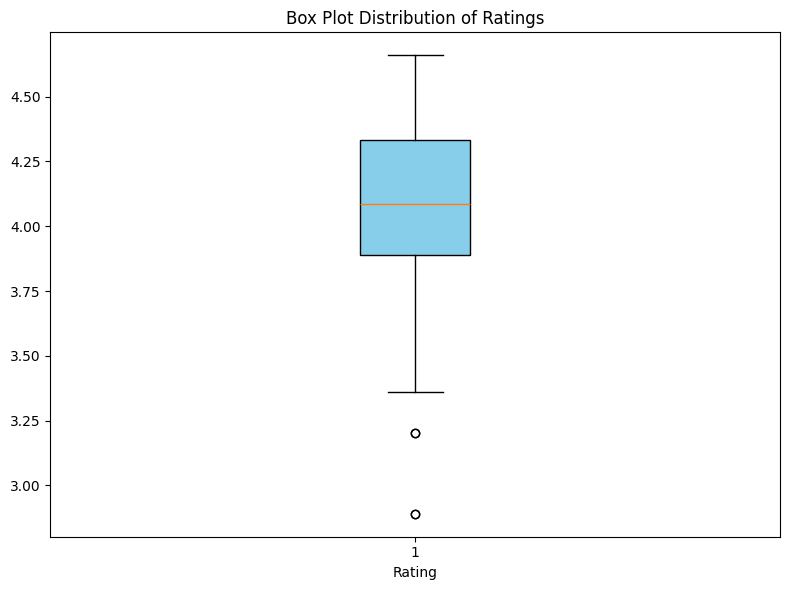

In [14]:
import matplotlib.pyplot as plt 
# Create a box plot for the distribution of 'rating'
plt.figure(figsize=(8, 6))
plt.boxplot(df['rating'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Add labels and title
plt.xlabel('Rating')
plt.title('Box Plot Distribution of Ratings')

# Display the plot
plt.tight_layout()
plt.show()

#### - Analise de generos com invoice alto 

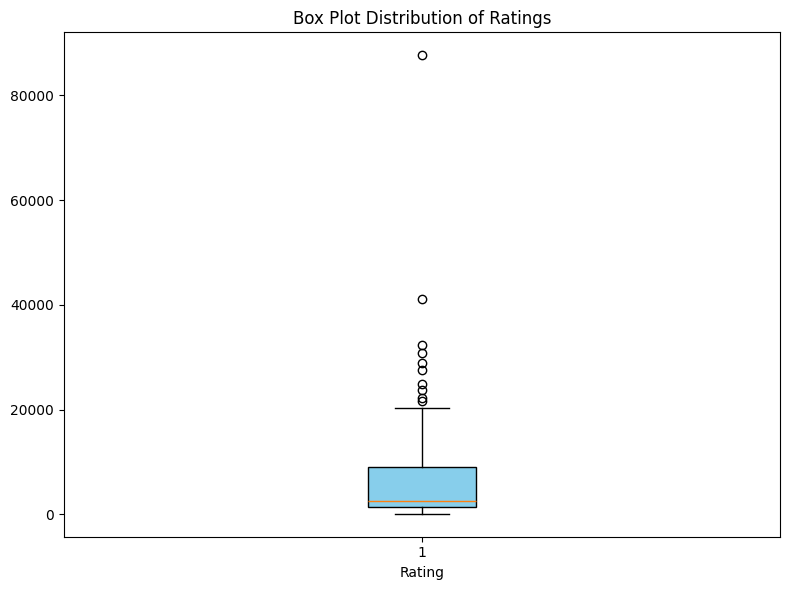

In [56]:
import matplotlib.pyplot as plt 
# Create a box plot for the distribution of 'rating'
plt.figure(figsize=(8, 6))
plt.boxplot(df['invoice'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Add labels and title
plt.xlabel('Rating')
plt.title('Box Plot Distribution of Ratings')

# Display the plot
plt.tight_layout()
plt.show()

In [62]:
high_invoice = df['invoice'].quantile(0.75)

In [65]:
high_invoice.dtype

dtype('float64')

In [71]:
## Definning df Sales count for high rating books 
df_genre_hi = df[df['invoice'] >= high_invoice]
df_genre_hi['genre_desc'].value_counts()

genre_desc
SciFi/Fantasy    8
Mystery          5
Romance          4
Young Adult      3
Childrens        2
Fiction          2
Name: count, dtype: int64

In [15]:
high_rating = df['rating'].quantile(0.75)
low_sales_count = df['sales_count'].quantile(0.75)

df['sales_count'] = df['sales_count'].astype('float64')

df['book_title'] = df['book_title'].fillna('Unknown')


## Definning df Sales count for high rating books 
df_sales_count_hr = df[(df['rating'] >= high_rating) & (df['sales_count'] <= low_sales_count)]
df_sales_count_hr = df_sales_count_hr.sort_values('sales_count', ascending=False)


df_sales_count_hr.head()

,isbn,rating_book_id,book_title,rating,price,publisher_name,marketing_spend,genre_desc,series_name,format_desc,author_name,Year Won,sales_count,invoice
83,989-28-229-3157-7,SE355,Saint Esme,4.34,9.50,Sound & Seas Co.,151000.0,Romance,Esme s Ladies,Mass market paperback,Lynne Danticat,2189.0,556.0,5282.00
35,989-28-3705-966-2,HP265,Heliotrope Pajamas,4.54,10.99,Cedar House Publishers,72000.0,Childrens,None,Paperback,Malin Wolff,2182.0,374.0,4110.26
90,989-28-79-03683-6,TA182,The Spark and The Ashes,4.36,18.50,Etaoin Shrdlu Press,2320000.0,Young Adult,None,Hardcover,Ursula Karénine,2193.0,330.0,6105.00
29,989-28-3705-592-3,BF889,Banana Slug and the Glass Half Full,4.34,6.99,Cedar House Publishers,72000.0,Childrens,Banana Slug,Board book,Gloria Green,NaN,321.0,2243.79
7,989-28-79-51397-9,TT773,The Triscanipt,4.43,21.50,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,None,Hardcover,Ursula Karénine,NaN,249.0,5353.50


In [16]:
import plotly.express as px

# Create a bar graph with Plotly
fig = px.bar(
    df_sales_count_hr,
    x='book_title',
    y='sales_count',
    title='Sales Count of High Rating Books',
    labels={'book_title': 'Book Title', 'sales_count': 'Sales Count'},
    color='sales_count',
    color_continuous_scale='Viridis_r'
)

# Customize layout for better readability
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title='Book Title',
    yaxis_title='Sales Count',
    template='plotly_white'
)

# Display the plot
fig.show()

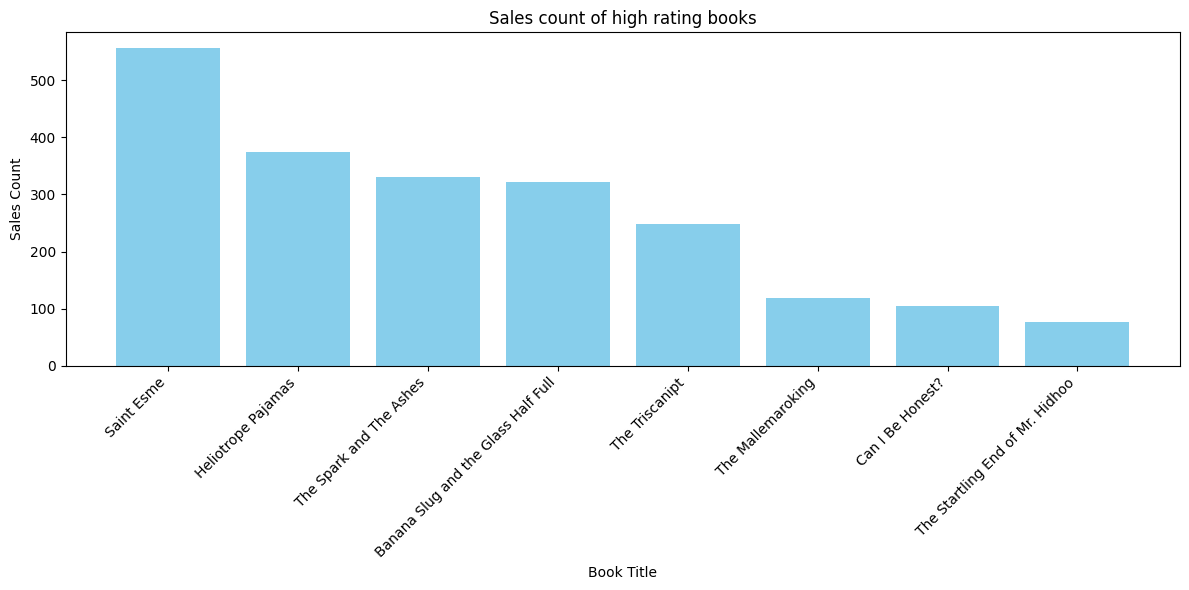

In [17]:
import matplotlib.pyplot as plt
# Plotting a bar graph with invoices and book titles as labels
plt.figure(figsize=(12, 6))
plt.bar(df_sales_count_hr['book_title'], df_sales_count_hr['sales_count'], color='skyblue')
plt.xlabel('Book Title')
plt.ylabel('Sales Count')
plt.title('Sales count of high rating books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### estudar pq estes livros nao vendem bem 

## Insight 2.0 - Performance dos Livros

### 
Insights:
- Identificar os livros mais vendidos e bem avaliados para determinar quais gêneros ou autores têm maior apelo.
- Cruzar as vendas e avaliações por editoras para avaliar o desempenho dos editores.
- Analisar se há correlação entre boas avaliações (ratings) e altos volumes de vendas (sales).

In [45]:
df['book_title'].nunique()

57

In [46]:
df['format_desc'].nunique()

6

In [47]:
df['publisher_name'].nunique()

4

In [49]:
df['genre_desc'].nunique()

8

In [50]:
df.sort_values('invoice', ascending=False, inplace = True)
df_10 = df[:10]
df_remaining = df.iloc[25:]
df_10.head()

,isbn,rating_book_id,book_title,rating,price,publisher_name,marketing_spend,genre_desc,series_name,format_desc,author_name,year_won,sales_count,invoice,price_range
17,989-28-79-74374-1,RR774,Rystwyth,4.46,21.50,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Hardcover,Bianca Thompson,2193.0,4077.0,87655.50,20-30
3,989-28-79-13801-1,TM925,The Mallemaroking,4.66,8.99,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Mass market paperback,Bianca Thompson,2179.0,4568.0,41066.32,0-10
13,989-28-79-23023-4,PP866,Portmeirion,4.42,8.99,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,The Mallemaroking Saga,Mass market paperback,Bianca Thompson,2188.0,3606.0,32417.94,0-10
92,989-28-79-68089-3,BB194,Ballinby Boys,3.74,21.50,Etaoin Shrdlu Press,2320000.0,SciFi/Fantasy,None,Hardcover,Arthur McCrumb,2180.0,1433.0,30809.50,20-30
51,989-28-79-69807-2,NR695,9803 North Millworks Road,4.09,8.99,Etaoin Shrdlu Press,2320000.0,Mystery,Inspector Ryeslton,Mass market paperback,Carolyn Segal,NaN,3204.0,28803.96,0-10


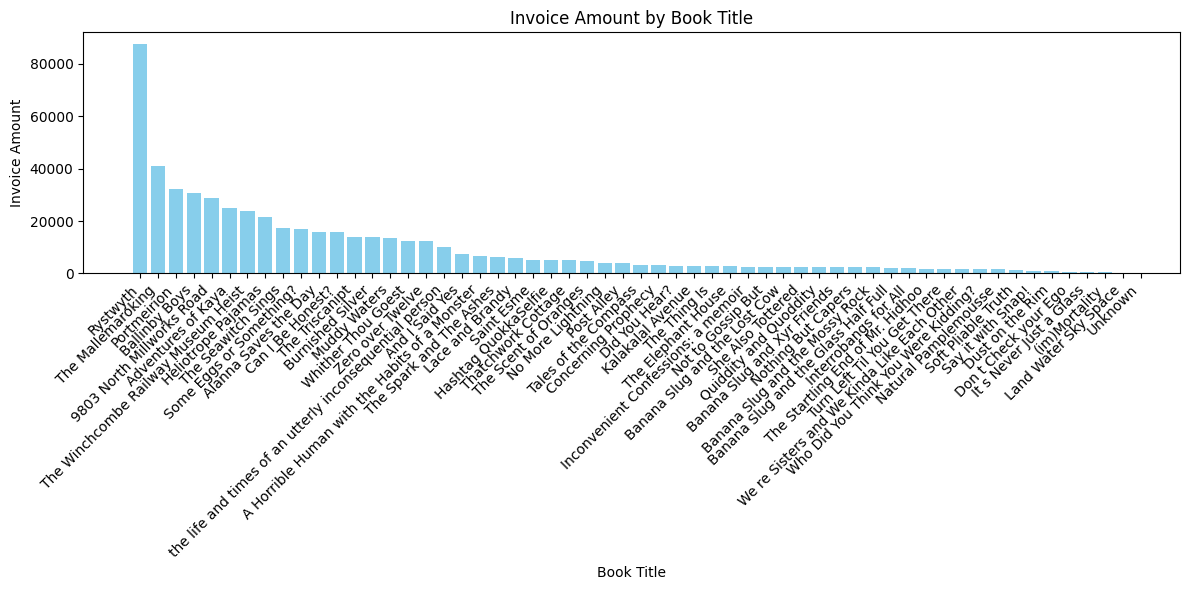

In [72]:
import matplotlib.pyplot as plt

# Plotting a bar graph with invoices and book titles as labels
plt.figure(figsize=(12, 6))
plt.bar(df['book_title'], df['invoice'], color='skyblue')
plt.xlabel('Book Title')
plt.ylabel('Invoice Amount')
plt.title('Invoice Amount by Book Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [52]:
df['genre_desc'].value_counts()

genre_desc
Fiction          22
SciFi/Fantasy    19
Childrens        12
Young Adult      12
Nonfiction       12
Romance           7
Mystery           6
Memoir            5
Name: count, dtype: int64

In [53]:
df_10['genre_desc'].value_counts()

genre_desc
SciFi/Fantasy    6
Mystery          2
Young Adult      1
Childrens        1
Name: count, dtype: int64

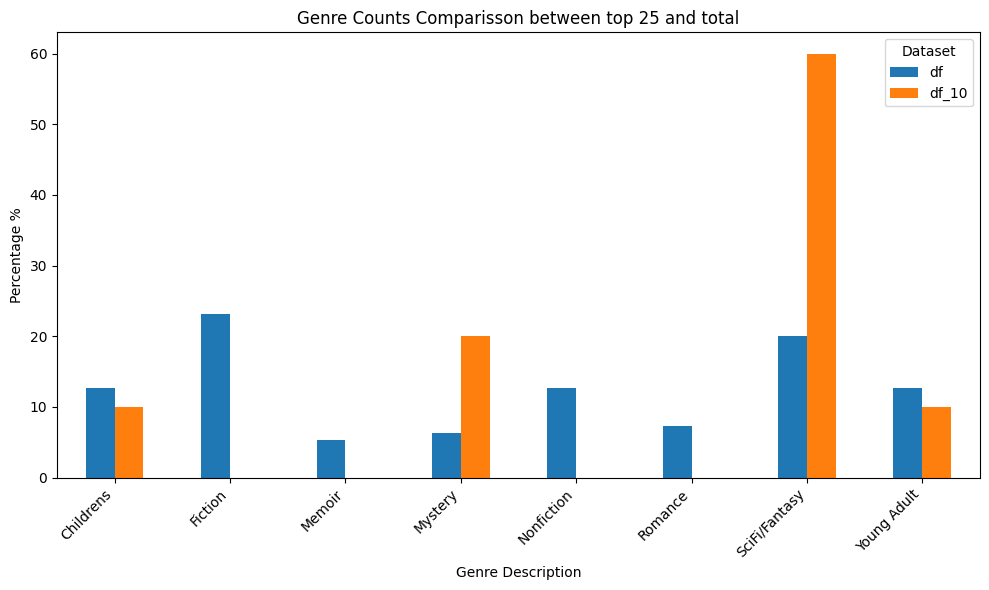

In [54]:
genre_comparrison = pd.DataFrame({'df':df['genre_desc'].value_counts(normalize = True)*100, 'df_10':df_10['genre_desc'].value_counts(normalize = True)*100}).fillna(0)

genre_comparrison.plot(kind = 'bar',
                       figsize=(10,6))

plt.title('Genre Counts Comparisson between top 25 and total')
plt.xlabel('Genre Description')
plt.ylabel('Percentage %')
plt.legend(title= 'Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

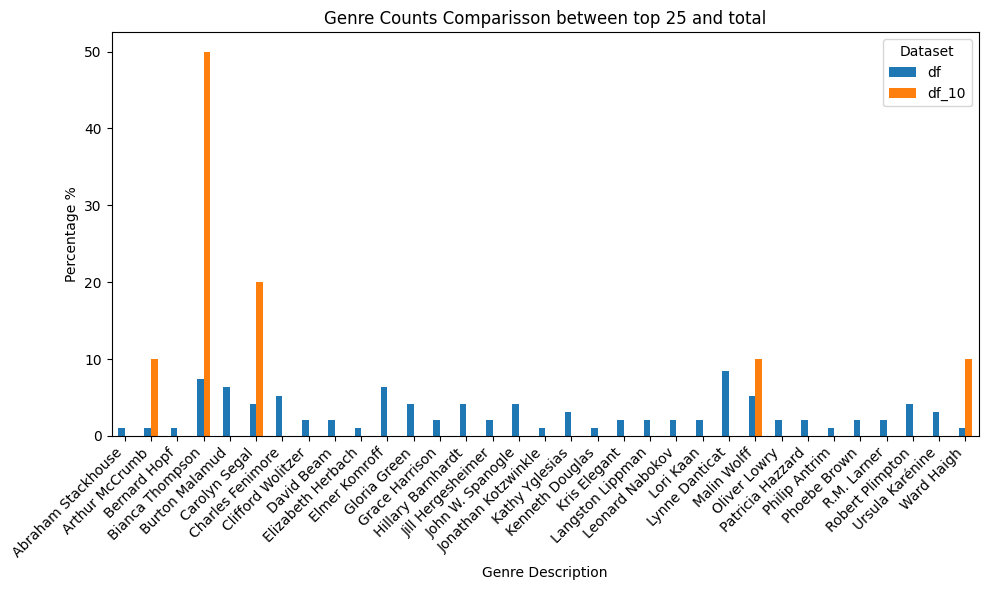

In [55]:
genre_comparrison = pd.DataFrame({'df':df['author_name'].value_counts(normalize = True)*100, 'df_10':df_10['author_name'].value_counts(normalize = True)*100}).fillna(0)

genre_comparrison.plot(kind = 'bar',
                       figsize=(10,6))

plt.title('Genre Counts Comparisson between top 25 and total')
plt.xlabel('Genre Description')
plt.ylabel('Percentage %')
plt.legend(title= 'Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [24]:
df_10['author_name'].value_counts()

author_name
Bianca Thompson     6
Carolyn Segal       4
Lynne Danticat      4
Charles Fenimore    2
David Beam          2
Arthur McCrumb      1
Ward Haigh          1
Malin Wolff         1
Bernard Hopf        1
Lori Kaan           1
Ursula Karénine     1
Burton Malamud      1
Name: count, dtype: int64

In [25]:
df_remaining['rating'].mean()
df_10['rating'].mean()

np.float64(4.172)

In [26]:
percentage_increase = (df_10['rating'].mean() - df_remaining['rating'].mean() ) * 100
print(f'O percentual de acréscimo dos top 25 diante do todo é de: {percentage_increase.round(2)}%')

O percentual de acréscimo dos top 25 diante do todo é de: 16.31%


## Insight 3.0 - Avaliar quais editoras consistentemente publicam livros de alta performance

In [27]:
# Vamos considerar livros com rating maior ou igual a 4 como de alta performance
high_performance_threshold = 4

# Filtrar apenas os livros de alta performance
high_performance_books = df[df['rating'] >= high_performance_threshold]

# Agrupar por editora e calcular métricas
publisher_performance = (
    high_performance_books.groupby('publisher_name')
    .agg(
        total_high_performance_books=('isbn', 'count'),  # Contagem de livros de alta performance
        avg_rating=('rating', 'mean'),  # Média de rating dos livros
        total_sales=('sales_count', 'sum'),  # Total de vendas dos livros de alta performance
        total_invoice=('invoice', 'sum')
    ).sort_values(by='total_high_performance_books', ascending=False)
)

publisher_performance


,total_high_performance_books,avg_rating,total_sales,total_invoice
publisher_name,,,,
Etaoin Shrdlu Press,27,4.311852,29051.0,394434.91
Cedar House Publishers,17,4.229412,11446.0,100725.58
Sound & Seas Co.,7,4.224286,7703.0,73178.50
Palimpsest Printing,6,4.161667,394.0,8459.08


## Insight 4.0 - Analisar o impacto de prêmios literários nas vendas e avaliações de livros

In [28]:
df.rename(columns={'Year Won': 'year_won'}, inplace=True)
# Separar por livros que ganharam awards
award = df[df['year_won'].notnull()]
non_award = df[df['year_won'].isnull()]

# Calculando metricas para livros com awards
award_impact = {
    'with_awards': {
        'avg_rating': award['rating'].mean(),
        'avg_sales': award['sales_count'].mean(),
        'total_books': len(award),
        'invoice': award['invoice'].sum()
    },
    'without_awards': {
        'avg_rating': non_award['rating'].mean(),
        'avg_sales': non_award['sales_count'].mean(),
        'total_books': len(non_award),
        'invoice': non_award['invoice'].sum()
    }
}

# Comparação do impacto
impact_df = pd.DataFrame(award_impact).T
impact_df


,avg_rating,avg_sales,total_books,invoice
with_awards,4.143929,949.000000,28.0,359431.75
without_awards,4.013235,465.537313,68.0,358072.64



## Insight 5.0 - Analisar quais autores têm maior volume de vendas e melhores avaliações

In [29]:

df['sales_count'].isna().sum()
# Agrupar por autor e calcular métricas de vendas e avaliações
author_performance = (
    df.groupby('author_name')
    .agg(
        total_sales=('sales_count', 'sum'),  # Total de vendas
        avg_rating=('rating', 'mean'),  # Média de avaliações
        total_books=('isbn', 'count')  # Total de livros publicados
    )
    .sort_values(by='total_sales', ascending=False)
)

# Ordenar pelo volume de vendas e salvar o resultado
author_performance = author_performance.sort_values(
    by=['total_sales', 'avg_rating'], ascending=[False, False]
)

author_performance


,total_sales,avg_rating,total_books
author_name,,,
Bianca Thompson,16047.0,4.562857,7
Lynne Danticat,8037.0,4.182500,8
Carolyn Segal,7548.0,4.060000,4
Malin Wolff,4692.0,4.336000,5
Charles Fenimore,2996.0,4.296000,5
Burton Malamud,2309.0,4.036667,6
Ursula Karénine,2131.0,4.406667,3
Ward Haigh,2077.0,4.420000,1
Bernard Hopf,1778.0,4.020000,1



## Insight - 6.0 Avaliar se séries de livros geram maior engajamento e vendas em relação a livros únicos

In [30]:

# Identificar livros que fazem parte de séries e livros únicos
books_in_series = df[df['series_name'].notnull()]
books_not_in_series = df[df['series_name'].isnull()]

# Calcular métricas para livros em séries e livros únicos
series_analysis = {
    'in_series': {
        'avg_rating': books_in_series['rating'].mean(),
        'avg_sales': books_in_series['sales_count'].mean(),
        'total_books': len(books_in_series),
        'invoice': books_in_series['invoice'].sum()
    },
    'not_in_series': {
        'avg_rating': books_not_in_series['rating'].mean(),
        'avg_sales': books_not_in_series['sales_count'].mean(),
        'total_books': len(books_not_in_series),
        'invoice': books_not_in_series['invoice'].sum()
    }
}

# Comparação do impacto
series_analysis_df = pd.DataFrame(series_analysis).T
series_analysis_df



,avg_rating,avg_sales,total_books,invoice
in_series,4.216452,1110.032258,31.0,421630.96
not_in_series,3.972615,364.875000,65.0,295873.43



## Insight 7.0 - Analisar quantidade de vendas por faixa de preço

/tmp/ipykernel_148545/3344494983.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_148545/3344494983.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,invoice,sales_count
price_range,,
0-10,298897.49,34404.0
10-20,147618.25,11453.0
20-30,258138.43,11541.0
30-50,12850.22,365.0


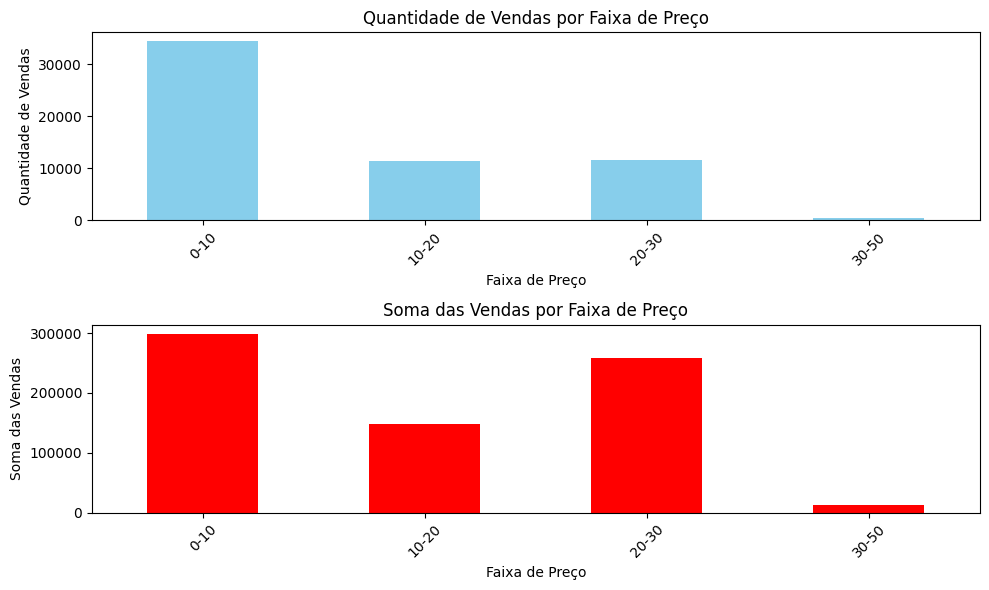

In [31]:

df['price'].min()
# Definindo as faixas de preço
bins = [0, 10, 20, 30, 50]  # Limites das faixas de preço
labels = ['0-10', '10-20', '20-30', '30-50']  # Nomes das faixas

# Criando uma coluna de faixas de preço
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Agregando as vendas por faixa de preço
sales_by_price_range = df.groupby('price_range')['sales_count'].sum()
invoice_by_price_range = df.groupby('price_range')['invoice'].sum()

# Plotando o gráfico
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sales_by_price_range.plot(kind='bar', color='skyblue')

plt.title('Quantidade de Vendas por Faixa de Preço')
plt.xlabel('Faixa de Preço')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(2, 1, 2)
invoice_by_price_range.plot(kind='bar', color='red')

plt.title('Soma das Vendas por Faixa de Preço')
plt.xlabel('Faixa de Preço')
plt.ylabel('Soma das Vendas')
plt.xticks(rotation=45)
plt.tight_layout()

df_by_price_range = pd.merge(invoice_by_price_range, sales_by_price_range, on='price_range', how='inner')
df_by_price_range




## Insight 8.0 - Analisando se o investimento por publisher em marketing vale a pena em relação ao invoice

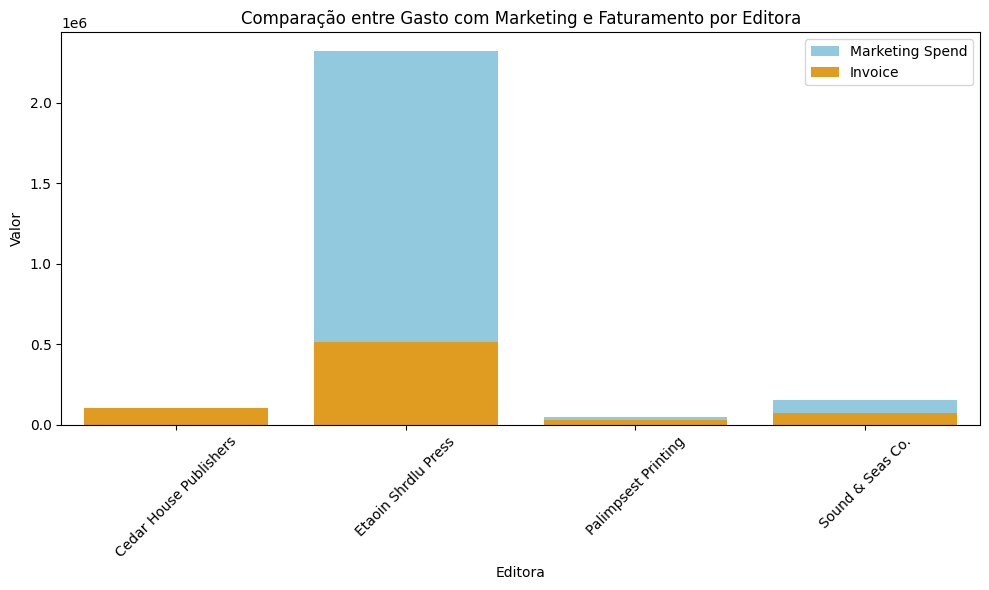

,publisher_name,marketing_spend,invoice
0,Cedar House Publishers,72000.0,101520.95
1,Etaoin Shrdlu Press,2320000.0,512744.68
2,Palimpsest Printing,48000.0,30060.26
3,Sound & Seas Co.,151000.0,73178.50


In [32]:

import seaborn as sns
# Agrupando os dados por 'publisher_name' e somando 'marketing_spend' e 'invoice'
df_pm = df.groupby('publisher_name').agg({'marketing_spend': 'mean', 'invoice': 'sum'}).reset_index()

# Plotando o gráfico de barras emparelhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para o gasto com marketing
sns.barplot(data=df_pm, x='publisher_name', y='marketing_spend', color='skyblue', label='Marketing Spend', ax=ax)

# Barras para o faturamento (invoice)
sns.barplot(data=df_pm, x='publisher_name', y='invoice', color='orange', label='Invoice', ax=ax)

# Adicionando título e rótulos
plt.title('Comparação entre Gasto com Marketing e Faturamento por Editora')
plt.xlabel('Editora')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
df_pm

## Features

### Publisher View

In [33]:
df_publisher = df.groupby('publisher_name', as_index=False).agg({
    'invoice': 'sum',
    'sales_count':'sum',
    'rating': 'mean',
    'price':'mean'
})
df_publisher.sort_values('invoice', ascending= False).round(2)

,publisher_name,invoice,sales_count,rating,price
1,Etaoin Shrdlu Press,512744.68,36918.0,4.04,17.33
0,Cedar House Publishers,101520.95,11509.0,4.17,10.70
3,Sound & Seas Co.,73178.50,7703.0,4.22,9.50
2,Palimpsest Printing,30060.26,1633.0,3.87,24.23


### Format View

In [34]:
df_format = df.groupby('format_desc', as_index=False).agg({
    'invoice': 'sum',
    'sales_count':'sum',
    'rating': 'mean',
    'price':'mean'
})
df_format.sort_values('invoice', ascending= False).round(2)

,format_desc,invoice,sales_count,rating,price
2,Hardcover,265965.50,11824.0,3.99,25.42
3,Mass market paperback,245588.72,26881.0,4.15,9.16
5,Trade paperback,149161.76,12299.0,3.93,13.41
0,Board book,31020.44,4956.0,4.20,6.79
1,Graphic,15353.60,640.0,4.19,23.99
4,Paperback,10414.37,1163.0,4.26,8.49


### Genre View

In [35]:
df_genre = df.groupby('genre_desc', as_index=False).agg({
    'invoice': 'sum',
    'sales_count':'sum',
    'rating': 'mean',
    'price':'mean'
})
df_genre.sort_values('invoice', ascending= False).round(2)

,genre_desc,invoice,sales_count,rating,price
6,SciFi/Fantasy,294438.87,20514.0,4.08,16.26
3,Mystery,106022.95,9005.0,4.04,15.66
1,Fiction,91148.44,5799.0,3.96,19.30
5,Romance,73178.50,7703.0,4.22,9.50
7,Young Adult,70501.33,5570.0,4.14,15.74
0,Childrens,57419.03,7897.0,4.22,7.82
4,Nonfiction,16432.19,883.0,3.76,24.66
2,Memoir,8363.08,392.0,4.13,24.79


### Author View

In [36]:
df_author = df.groupby('author_name', as_index=False).agg({
    'invoice': 'sum',
    'sales_count':'sum',
    'rating': 'mean',
    'price':'mean'
})
df_author.sort_values('invoice', ascending= False).round(2)

,author_name,invoice,sales_count,rating,price
3,Bianca Thompson,230738.07,16047.0,4.56,17.00
5,Carolyn Segal,91796.52,7548.0,4.06,15.99
23,Lynne Danticat,76181.16,8037.0,4.18,9.44
6,Charles Fenimore,39316.12,2996.0,4.30,16.99
24,Malin Wolff,31040.08,4692.0,4.34,7.99
1,Arthur McCrumb,30809.50,1433.0,3.74,21.50
4,Burton Malamud,27122.48,2309.0,4.04,18.49
31,Ursula Karénine,25410.98,2131.0,4.41,16.33
32,Ward Haigh,24903.23,2077.0,4.42,11.99
8,David Beam,18227.80,887.0,3.20,24.65


In [37]:
# Calculate the correlation between 'rating' and 'marketing_spend'
correlation = df[['rating', 'sales_count']].corr()

# Display the correlation result
correlation

,rating,sales_count
rating,1.000000,0.372971
sales_count,0.372971,1.000000


In [38]:
# Calculate the correlation between 'rating' and 'marketing_spend'
correlation = df_filtered[['rating', 'marketing_spend']].corr()

# Display the correlation result
correlation

,rating,marketing_spend
rating,1.000000,-0.010949
marketing_spend,-0.010949,1.000000


In [39]:
df_filtered['isbn'].nunique()

93

In [40]:
(df_filtered.isnull().sum()/ len(df)) * 100

isbn                1.041667
rating_book_id      0.000000
book_title          1.041667
rating              0.000000
price               1.041667
publisher_name      1.041667
marketing_spend     1.041667
genre_desc          1.041667
series_name        67.708333
format_desc         1.041667
author_name         1.041667
Year Won           70.833333
dtype: float64